# Análisis Exploratorio de Datos (EDA): Trastornos Depresivos y Factores Socioeconómicos (1992-2017)

## Introducción

Este notebook presenta un análisis exploratorio de datos (EDA) sobre la relación entre los trastornos depresivos y diversos factores socioeconómicos, como el desempleo, el acceso a la sanidad y la tasa de suicidios, a nivel global entre 1992 y 2017. Se emplean herramientas como `pandas`, `numpy`, `matplotlib` y `seaborn` para la manipulación, análisis y visualización de datos, con el objetivo de detectar patrones y contrastar hipótesis previamente formuladas.

El estudio se basa en datos obtenidos de Kaggle y HumanProgress, los cuales han sido limpiados y estructurados para garantizar su coherencia. A través de este análisis, se busca proporcionar información relevante sobre cómo los factores socioeconómicos pueden influir en la salud mental a nivel global.

A continuación, se detallan los objetivos del análisis, la metodología utilizada y los resultados obtenidos.


Lo primero será mostrar el proceso de limpiado, filtrado y unión de los diferente datasets con los que voy a trabajar.

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

El primer datset es el de suicidios, un dataset encontrado en la Web de Human Progress, que entre otras cosas nos enseña el número de suicidios por cada 100 mil habitantes de cada pais desde 1990 hasta 2017

In [203]:
suicidios = pd.read_csv(".\datos\Datos suicidio.csv")

In [ ]:
suicidios.info()
suicidios.head()
suicidios.drop(columns="Unnamed: 29",inplace=True)

In [205]:
suicidios.dropna(thresh=20,inplace=True)

In [206]:
for columna in suicidios.columns:
    columna.strip()
    suicidios.rename(columns= {columna : columna.strip()},inplace = True)


In [207]:
suicidios.rename(columns= {"country_name": "Country"},inplace = True)


In [208]:
poblacion = pd.read_csv(".\datos\Poblacion.csv")
continentes = pd.read_csv(".\datos\countries_continents.csv")
df_cont = pd.merge(suicidios,continentes,on= "Country",how = "outer")
suicidios_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [209]:
suicidios_final.dropna(axis = 0,thresh=30,inplace=True)

In [210]:
suicidios_final.drop(columns="1990",inplace=True)

In [211]:
suicidios_long = suicidios_final.melt(id_vars=['Country', 'Continent', 'Population'],var_name='año',value_name='suicidios')

El segundo dataset es el de desempleo, también encontrado en Human Progress, y que nos aporta una tasa de desempleo por país y año. Lo uniré al de suicidios.


In [212]:
desempleo= pd.read_csv(".\datos\desempleo.csv")

In [213]:
desempleo.drop(columns={"Unnamed: 33"},inplace=True)

In [214]:
desempleo.drop(axis=1,columns={"2018","2019","2020","2021","2022"},inplace=True)

In [215]:
desempleo.dropna(how="all",inplace=True)
desempleo.rename(columns={"country_name":"Country"},inplace=True)

In [216]:
poblacion = pd.read_csv(".\datos\Poblacion.csv")
continentes = pd.read_csv(".\datos\countries_continents.csv")
df_cont = pd.merge(desempleo,continentes,on= "Country",how = "outer")
desempleo_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [217]:
desempleo_final.dropna(axis=0,thresh=30,inplace=True)

In [218]:
desempleo_long = desempleo_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='desempleo')

Proceso de unir los datsets

In [219]:
suicidio_desempleo = pd.merge(suicidios_long,desempleo_long,how="inner",on=["Country","Continent","año"])

El tercer dataset nos aporta un estadístico que ondica la accesibilidad de un país en un determinado año a la sanidad/ salud.

In [220]:
sanidad = pd.read_csv(".\datos\sanidad.csv")

In [ ]:
sanidad.head()
sanidad.columns
sanidad.info()

In [222]:
for columna in sanidad.columns:
    columna.strip()
    sanidad.rename(columns= {columna : columna.strip()},inplace = True)

In [223]:
sanidad.drop(columns={"1990","Unnamed: 27"},inplace=True)

In [224]:
for columna in sanidad.select_dtypes(include=['object']).columns:
    sanidad[columna] = sanidad[columna].str.replace('*', '', regex=False) 

In [225]:
sanidad.rename(columns={"country_name":"Country"},inplace=True)

In [226]:
df_cont = pd.merge(sanidad,continentes,on= "Country",how = "outer")
sanidad_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [227]:
sanidad_final.dropna(thresh=28,inplace=True)

In [228]:
sanidad_final[["1996","1997","1998","1999","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013","2014"]] = sanidad_final[["1996","1997","1998","1999","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013","2014"]].astype(float)

In [229]:
sanidad_long = sanidad_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='sanidad')

UNO EL DATASET SANIDAD A LA UNIÓN DE LOS OTROS DOS

In [230]:
suicidio_desempleo_sanidad = pd.merge(suicidio_desempleo,sanidad_long,how="inner",on=["Country","Continent","año"])

LIMPIO Y PREPARO EL DATASET DE WORLD HAPPINESS REPORT

In [231]:
felicidad = pd.read_csv(".\datos\World Happiness Report.csv")

In [232]:
felicidad = felicidad[["Country Name","Year","Social Support","Freedom To Make Life Choices"]]

In [233]:
felicidad.rename(columns={"Country Name":"Country"},inplace=True)

In [ ]:
felicidad.info()
felicidad.head()

In [235]:
felicidad_ordenada = felicidad.pivot_table(index=['Country', 'Year'],values=['Social Support', 'Freedom To Make Life Choices'],aggfunc='mean')


LIMPIO Y PREPARO EL DATASET DE PREVALENCIA DE LA DEPRESIÓN

In [236]:
depresion = pd.read_csv(".\datos\depresion.csv")

In [237]:
for columna in depresion.columns:
    columna.strip()
    depresion.rename(columns= {columna : columna.strip()},inplace = True)

In [238]:
depresion.drop(columns={"1990",'Unnamed: 28'},inplace=True)

In [ ]:
depresion.info()

In [240]:
depresion.rename(columns={"country_name":"Country"},inplace=True)

In [241]:
depresion.dropna(thresh=20,inplace=True)

In [242]:
df_cont = pd.merge(depresion,continentes,on= "Country",how = "outer")
depresion_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [243]:
depresion_final.dropna(thresh=28,inplace=True)

In [244]:
depresion_long = depresion_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='depresion')

UNO LA ÚLTIMA VARIABLE A EL DATASET CON LAS VARIABLES SUICIDIOS SANIDAD Y DESEMPLEO

In [245]:
variables = pd.merge(suicidio_desempleo_sanidad,depresion_long,how="inner",on=["Country","Continent","año"])

In [246]:
variables["sanidad"] = variables["sanidad"].astype(float)

YA TENGO LOS DOS DATA SETS CON LOS QUE VOY A TRABAJAR LIMPIOS: VARIABLES Y WORLD HAPPINESS REPORT

In [ ]:
variables.info()

In [ ]:
felicidad_ordenada.info()

ESTADÍSTICOS Y GRÁFICOS:

HIPÓTESIS 1 : Los diagnósticos de depresión han ido aumentado progresivamente a nivel global desde la década de 1990

In [ ]:
variables.groupby(["Continent","año"])[["depresion"]].mean()

Esto me proporciona una media por continente con los valores de los paises pero sin tener en cuenta la poblacion de cada uno. Utilizaré otro método para obtener una media relativa

In [250]:
variables["personas depresion"] = (variables["depresion"]*variables["Population"]/100)
variables["total personas continente"]=variables.groupby(["año","Continent"])["Population"].transform("sum")
variables["peso_ponderacion"] = variables["Population"]/variables["total personas continente"] 
variables["depresion ponderada"] = variables["personas depresion"]*variables["peso_ponderacion"]
variables["porcentaje depresion"] = (variables.groupby(["año","Continent"])["personas depresion"].transform("sum")/variables["total personas continente"])*100

In [ ]:
variables.groupby(["año","Continent"])["Population"].transform("sum")

In [252]:
años = ["1992","1995","2000","2005","2010","2015"]
porcentajes_por_años = variables[variables["año"].isin(años)][["porcentaje depresion","Continent","año"]]
resultados = porcentajes_por_años.groupby(["Continent","año"])["porcentaje depresion"].mean()

In [ ]:
resultados = pd.DataFrame(resultados)
resultados

In [ ]:
tabla_depresion = resultados.pivot_table(index="Continent",columns="año",values="porcentaje depresion")
tabla_depresion

In [ ]:
tabla_larga = tabla_depresion.reset_index().melt(id_vars="Continent", var_name="Año",value_name="Porcentaje depresion")
tabla_larga

TABLA HIPÓTESIS 1, CONTINENTES CON MÁS PREVALENCIA

(4.1, 4.65)

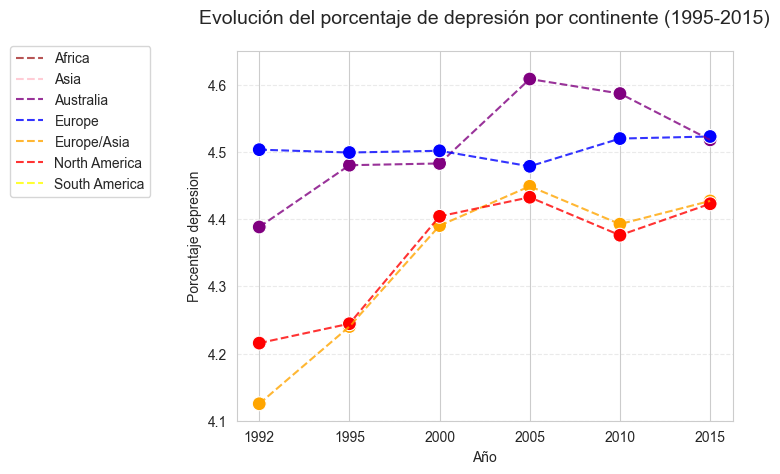

In [256]:
lista_colores =["Brown","Pink","Purple","Blue","orange","Red","yellow"]
sns.scatterplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,legend=False, markers = ["o","s","D","^","v","p","*"], s = 100)
sns.lineplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,linestyle="--",linewidth = 1.5,alpha =0.8)
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Evolución del porcentaje de depresión por continente (1995-2015)",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.4)
plt. ylim(4.1,4.65)


TABLA HIPÓTESIS 1, CONTINENTES MENOS PREVALENCIA

(3.05, 3.75)

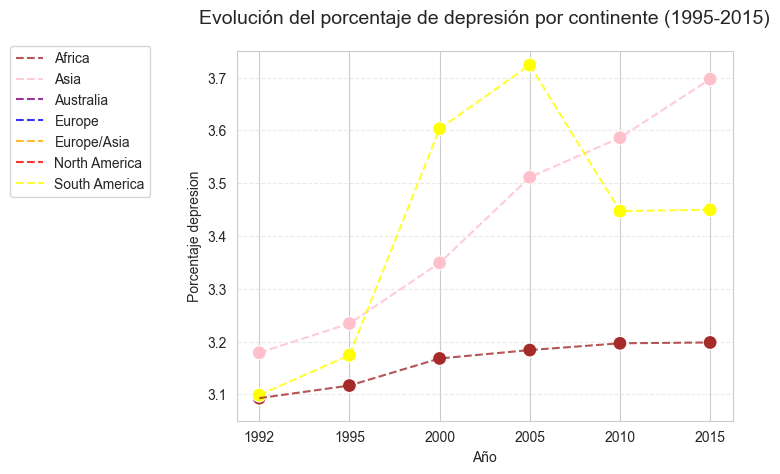

In [257]:
lista_colores =["Brown","Pink","Purple","Blue","orange","Red","yellow"]
sns.scatterplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,legend=False, markers = ["o","s","D","^","v","p","*"], s = 100)
sns.lineplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,linestyle="--",linewidth = 1.5,alpha =0.8)
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Evolución del porcentaje de depresión por continente (1995-2015)",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.4)
plt.ylim(3.05,3.75)

Aunque si se puede observar que las tasa de depresión por continente sigue una tendencia creciente general en el periodo seleccionado, existen excepciones y picos que hacen que seamos cautos con las conclusiones.

HIPÓTESIS 2: Los países con tasas más altas de trastornos depresivos serán también los países con los datos más altos de suicidio. 

In [ ]:
variables["suicidios totales"] = (variables["Population"]/100000)*variables["suicidios"]
variables

In [ ]:
variables.groupby(["año"])[["depresion"]].idxmax()

In [ ]:
suicidios_depresion = variables[variables["año"].isin(años)][["depresion","Country","año","suicidios"]]
suicidios_depresion

In [261]:
tabla_relacion_suicidios_depresion = suicidios_depresion.groupby(["Country","año"])[["depresion","suicidios"]].mean()

In [ ]:
tablasd = tabla_relacion_suicidios_depresion.pivot_table(index="Country",columns="año",values=["depresion","suicidios"])
tablasd

In [263]:
media_mundial_suicidios_2015 = tablasd[("suicidios","2015")].mean()
media_mundial_suicidios_1995 = tablasd[("suicidios","1995")].mean()

In [264]:
top3_paises_depresion_2015 = tablasd[("depresion","2015")].nlargest(3)

In [265]:
top3_paises_depresion_suicidios_2015 = tablasd.loc[tablasd[("depresion","2015")].nlargest(3).index,("suicidios","2015")]

GRÁFICO PARA VER RELACION SUICIDIOS VS DEPRESIÓN 1995


In [ ]:
top3_paises_depresion_1995 = tablasd[("depresion","1995")].nlargest(15)
top3_paises_depresion_1995

In [267]:
top3_paises_depresion_suicidios_1995 = tablasd.loc[tablasd[("depresion","1995")].nlargest(15).index,("suicidios","1995")]

In [ ]:
top3_paises_depresion_suicidios_1995.index

In [ ]:
top3_paises_depresion_suicidios_1995.values

In [ ]:
data_top_1995 = pd.DataFrame({"Pais":top3_paises_depresion_suicidios_1995.index,"Depresion":top3_paises_depresion_1995.values,"Suicidios":top3_paises_depresion_suicidios_1995.values})
data_top_1995

Text(0.5, 1.0, 'Prevalencia depresión vs suicidios (top 15 países 1995)')

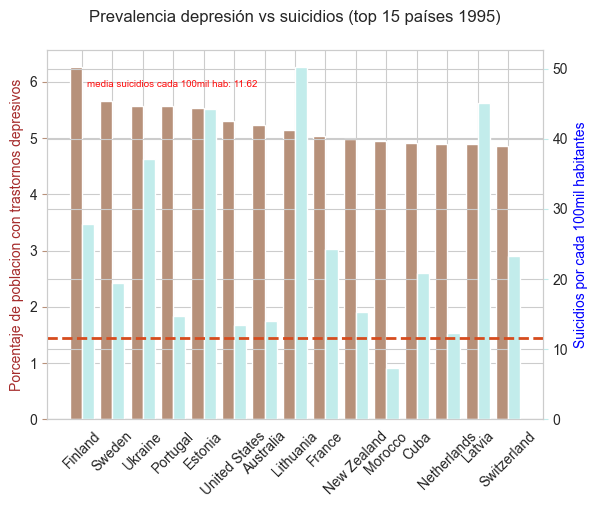

In [271]:
fig,ax1 = plt.subplots()
ax1.bar(x = np.arange(len(data_top_1995)) -0.2,height = data_top_1995["Depresion"],data= data_top_1995,width=0.4,color ="#b7917a",label= "puntuacion depresion")
ax1.set_ylabel("Porcentaje de poblacion con trastornos depresivos",color = "brown")
ax1.tick_params(axis="y",color="#b7917a")
ax1.set_xticks(np.arange(len(data_top_1995)))
ax1.set_xticklabels(data_top_1995["Pais"], rotation = 45)
ax2 = ax1.twinx() #Encontrado en internet,para compartir ejex pero cambiar el y
ax2.bar(x=np.arange(len(data_top_1995))+0.2,height = data_top_1995["Suicidios"],data= data_top_1995,width=0.4,color ="#c2eceb",label = "Suicidios por cada 100mil habitantes")
ax2.set_ylabel("Suicidios por cada 100mil habitantes",color = "b")
ax2.tick_params(axis="y",color="#c2eceb")
ax2.axhline(y=media_mundial_suicidios_1995,color ="#d64c1e",linestyle = "--",linewidth= 2,label ="Media mundial suicidios 1995")
plt.annotate(f'media suicidios cada 100mil hab: {media_mundial_suicidios_1995:.2f}',xy=(0.08,0.9),xycoords="axes fraction", fontsize = 7, alpha = 0.95,color ="r")
plt.title("Prevalencia depresión vs suicidios (top 15 países 1995)",pad = 20)


AHORA CON EL TOP 3 PAISES CON MENOS PREVALENCIA 

In [ ]:
Low3_paises_depresion_1995 = tablasd[("depresion","1995")].nsmallest(15)
tablasd[("depresion","1995")].nsmallest(15)

In [273]:
Low3_paises_depresion_suicidios_1995 = tablasd.loc[tablasd[("depresion","1995")].nsmallest(15).index,("suicidios","1995")]

In [274]:
data_low_1995 = pd.DataFrame({"Pais":Low3_paises_depresion_suicidios_1995.index,"Depresion":Low3_paises_depresion_1995.values,"Suicidios":Low3_paises_depresion_suicidios_1995.values})

Text(0.5, 1.0, 'Prevalencia depresión vs suicidios (Bottom 15 países 1995)')

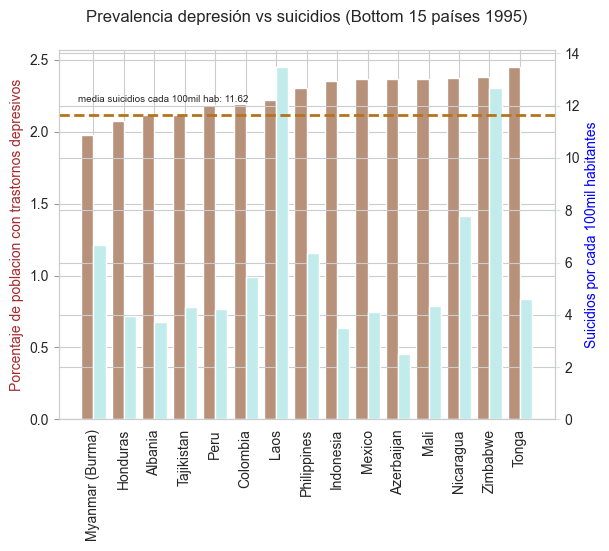

In [275]:
fig,ax1 = plt.subplots()
ax1.bar(x = np.arange(len(data_low_1995)) -0.2,height = data_low_1995["Depresion"],data= data_low_1995,width=0.4,color ="#b7917a",label= "puntuacion depresion")
ax1.set_ylabel("Porcentaje de poblacion con trastornos depresivos",color = "brown")
ax1.tick_params(axis="y",color="#b7917a")
ax1.set_xticks(np.arange(len(data_low_1995)))
ax1.set_xticklabels(data_low_1995["Pais"], rotation = 90)
ax2 = ax1.twinx() #Encontrado en internet,para compartir ejex pero cambiar el y
ax2.bar(x=np.arange(len(data_low_1995))+0.2,height = data_low_1995["Suicidios"],data= data_low_1995,width=0.4,color ="#c2eceb",label = "Suicidios por cada 100mil habitantes")
ax2.set_ylabel("Suicidios por cada 100mil habitantes",color = "b")
ax2.tick_params(axis="y",color="#c2eceb")
ax2.axhline(y=media_mundial_suicidios_1995,color ="#B5731B",linestyle = "--",linewidth= 2,label ="Media mundial suicidios 1995")
plt.annotate(f'media suicidios cada 100mil hab: {media_mundial_suicidios_1995:.2f}',xy=(0.04,0.86),xycoords="axes fraction", fontsize = 7)
plt.title("Prevalencia depresión vs suicidios (Bottom 15 países 1995)",pad = 20)

Observamos tanto en la gráfica anterior como en esta que si parece existir una relación entre trastornos depresivos y la tasa de suicidios por cada 100 mil habitantes. Los 15 países con mayor índice de depresión en el año seleccionado superan la gran mayoría la media de suicidios en ese mismo año, en cambio en los 15 paises con las tasas más bajas sucede al contrario.

VISTOS LOS RESULTADOS, VAMOS A VER LA CORRELACIÓN ENTRE VARIABLES(SUICIDIOS CADA 100 MIL HABITANTES VS PREVALENCIA TRASTORNOS DEPRESIVOS)

In [276]:
variables["suicidios totales"].corr(variables["personas depresion"])

np.float64(0.9326388428475606)

In [277]:
variables["depresion"].corr(variables["suicidios"])

np.float64(0.5213141386874747)

Text(0.05, 0.95, 'corr: 0.52')

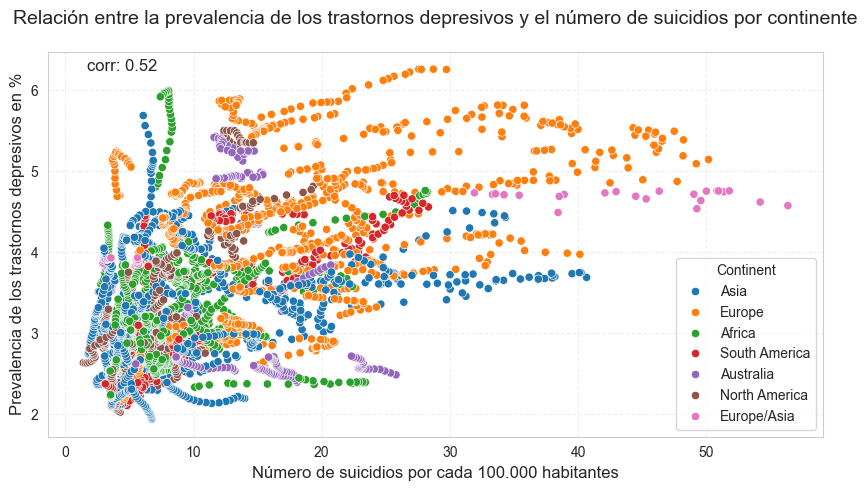

In [278]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= variables,x = "suicidios",y =  "depresion", hue= "Continent")
plt.title("Relación entre la prevalencia de los trastornos depresivos y el número de suicidios por continente",fontsize=14,pad = 20)
plt.xlabel("Número de suicidios por cada 100.000 habitantes",fontsize = 12)
plt.ylabel("Prevalencia de los trastornos depresivos en %",fontsize = 12)
plt.grid(axis = "both",linestyle = "--", alpha=0.3)
plt.annotate(f'corr: {variables["depresion"].corr(variables["suicidios"]):.2f}',xy=(0.05,0.95),xycoords="axes fraction", fontsize = 12)

La correlación entre las dos variables es positiva aunque no lo suficientemente grande para ser significativa. 

HIPÓTESIS 3: Periodos con tasas de desempleo más alto coincidirán con tasa más elevadas de suicidios

In [279]:
variables_spain=variables[variables["Country"]== "Spain"]


In [280]:
variables_spain = variables_spain.groupby("año")[["desempleo","depresion","suicidios","sanidad"]].mean()

In [281]:
spain2000 = variables_spain.iloc[:8:]
spain2008 = variables_spain.iloc[8:16:]
spaincrisis = variables_spain.iloc[16::]

In [282]:
spain2000["Franja"]= "1992-2000"
spain2008["Franja"]= "2000-2008"
spaincrisis["Franja"]= "2008-2017"


In [ ]:
spain = pd.concat((spain2000,spain2008,spaincrisis))
spain

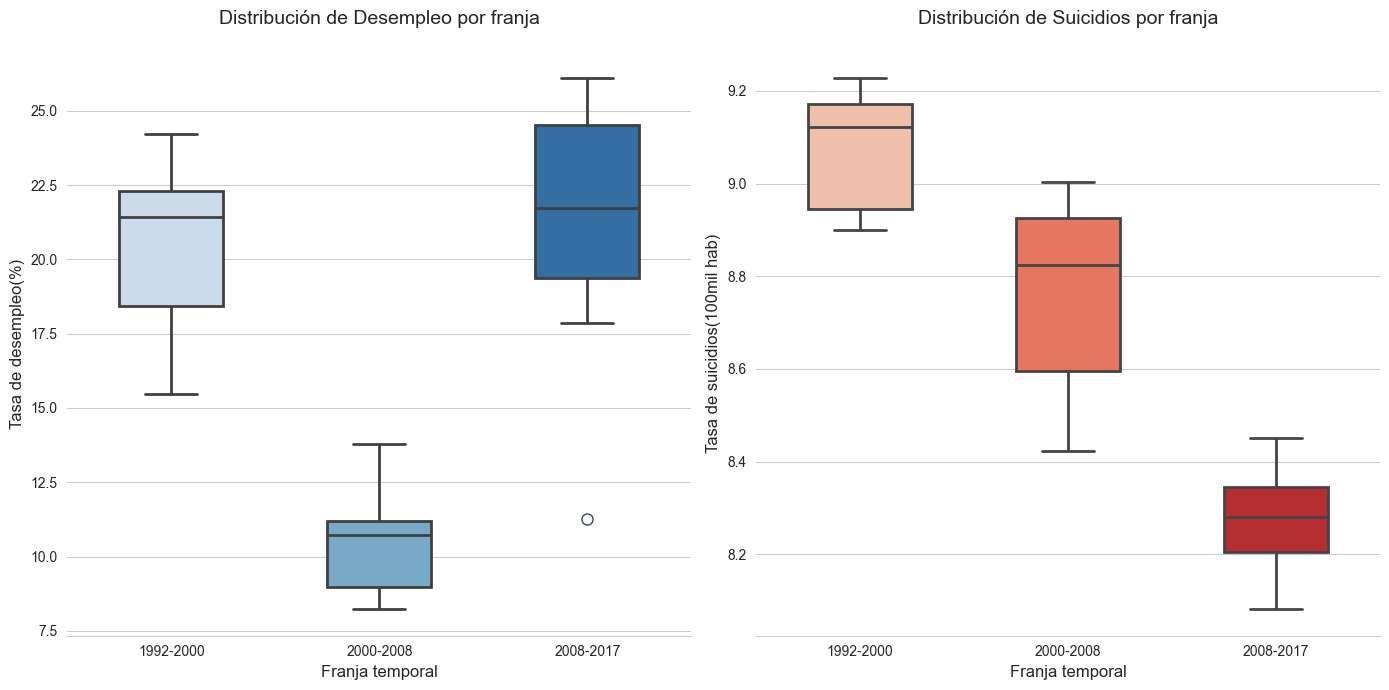

In [284]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(data=spain,x="Franja",y = "desempleo",palette="Blues",width=0.5,linewidth=2,flierprops={'marker':'o','markersize':8,'markerfacecolor':'none','markeredgecolor':'#34495e'})
plt.title("Distribución de Desempleo por franja",fontsize = 14,pad=20)
plt.xlabel("Franja temporal",fontsize = 12)
plt.ylabel("Tasa de desempleo(%)",fontsize=12)
sns.despine(left=True)
plt.subplot(1,2,2)
sns.boxplot(data=spain,x="Franja",y = "suicidios",palette="Reds",width=0.5,linewidth=2,flierprops={'marker':'o','markersize':8,'markerfacecolor':'none','markeredgecolor':'#34495e'})
plt.title("Distribución de Suicidios por franja",fontsize = 14,pad=20)
plt.xlabel("Franja temporal",fontsize = 12)
plt.ylabel("Tasa de suicidios(100mil hab)",fontsize=12)
sns.despine(left=True)
plt.tight_layout()

HIPÓTESIS 4 : Paises con tasas de desmpleo  altas serán paises con altas tasas de prevalencia de depresión

In [ ]:
variables.groupby("año")["desempleo"].nlargest(2)

In [286]:
añomax_desempleo = variables[variables["año"]=="2009"]

In [287]:
media_depresion_2002 = añomax_desempleo["depresion"].mean()
media_desempleo_2002 = añomax_desempleo["desempleo"].mean()

In [ ]:
añomax_desempleo["desempleo"].nlargest(40).index

In [289]:
datosg =añomax_desempleo.loc[[x for x in añomax_desempleo["desempleo"].nlargest(50).index],["Country","Continent","depresion","desempleo"]]

In [290]:
datosg =datosg[datosg["Continent"]== "Europe"]

In [291]:
media_dep_2009 =datosg["depresion"].mean()

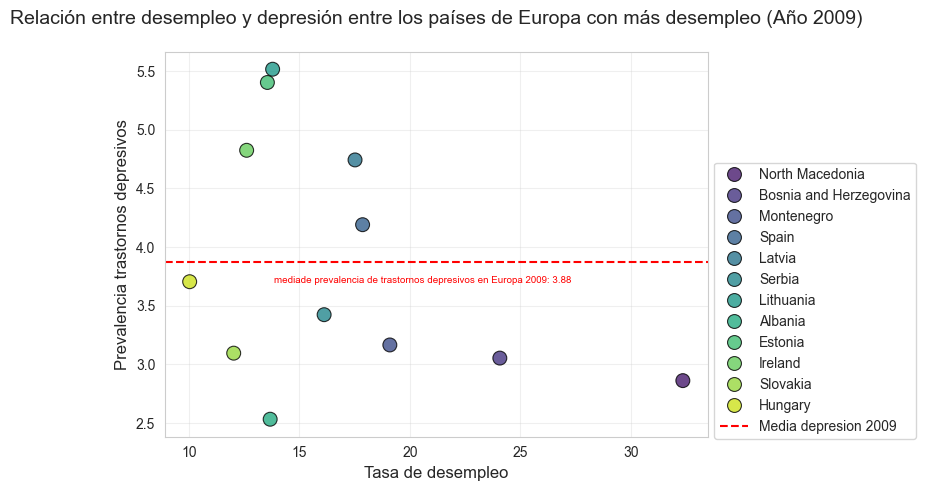

In [292]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.scatterplot(data=datosg,x = "desempleo",y = "depresion",hue= "Country",palette="viridis",s=100,alpha=0.8,edgecolor="black")
plt.axhline(media_dep_2009,color="r",linestyle="--",label= "Media depresion 2009")
plt.title("Relación entre desempleo y depresión entre los países de Europa con más desempleo (Año 2009)",fontsize=14,pad=20)
plt.xlabel("Tasa de desempleo",fontsize = 12)
plt.ylabel("Prevalencia trastornos depresivos",fontsize = 12)
plt.legend(bbox_to_anchor=(1,0.73))
plt.annotate(f'mediade prevalencia de trastornos depresivos en Europa 2009: {media_dep_2009:.2f}',xy=(0.2,0.40),xycoords="axes fraction", fontsize = 7,color = "r")
plt.grid(alpha=0.3)

HIPÓTESIS 5: Los países con menos acceso a la sanidad tendrán datos más altos en prevalencia de trastornos mentales

In [293]:
media_depresion = variables["depresion"].mean()

In [294]:
vareu = variables[variables["Continent"] == "Europe"]

In [ ]:
variables.groupby("Country")["sanidad"].mean().nsmallest(10).index

In [296]:
graf_s = vareu[vareu["Country"].isin(vareu.groupby("Country")["sanidad"].mean().nsmallest(5).index)]
graf_b = variables[variables["Country"].isin(variables.groupby("Country")["sanidad"].mean().nsmallest(5).index)]

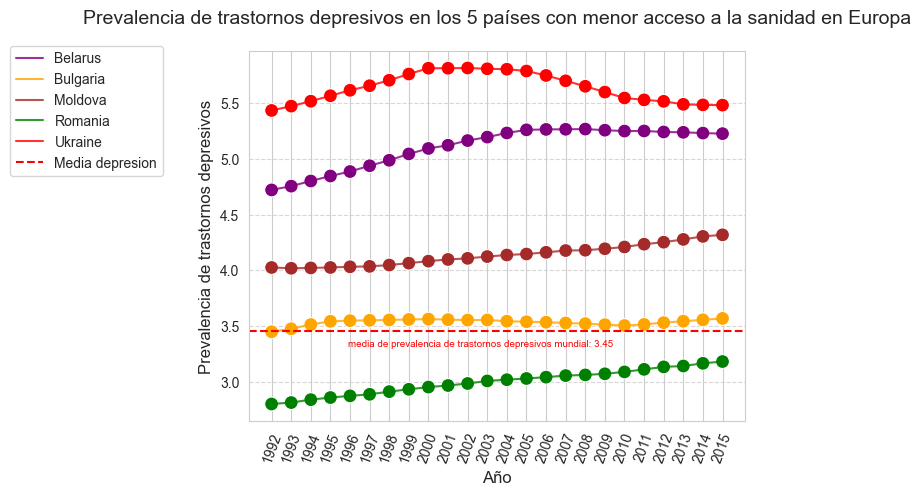

In [318]:
lista_colores2 = ["purple","orange","brown","green","red"]
sns.scatterplot(data = graf_s,x = "año",y = "depresion",hue = "Country",markers=["v","^"] ,palette = lista_colores2,legend=False, s = 100,)
sns.lineplot(data = graf_s,x = "año",y = "depresion",hue = "Country", palette = lista_colores2,linestyle="-",linewidth = 1.5,alpha =0.8)
plt.axhline(media_depresion,color="r",linestyle="--",label= "Media depresion")
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Prevalencia de trastornos depresivos en los 5 países con menor acceso a la sanidad en Europa",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.8)
plt.xticks(rotation=70,fontsize=10)
plt.annotate(f'media de prevalencia de trastornos depresivos mundial: {media_depresion:.2f}',xy=(0.2,0.20),xycoords="axes fraction", fontsize = 7,color = "r")
plt.xlabel("Año",fontsize=12)
plt.ylabel("Prevalencia de trastornos depresivos",fontsize = 12);


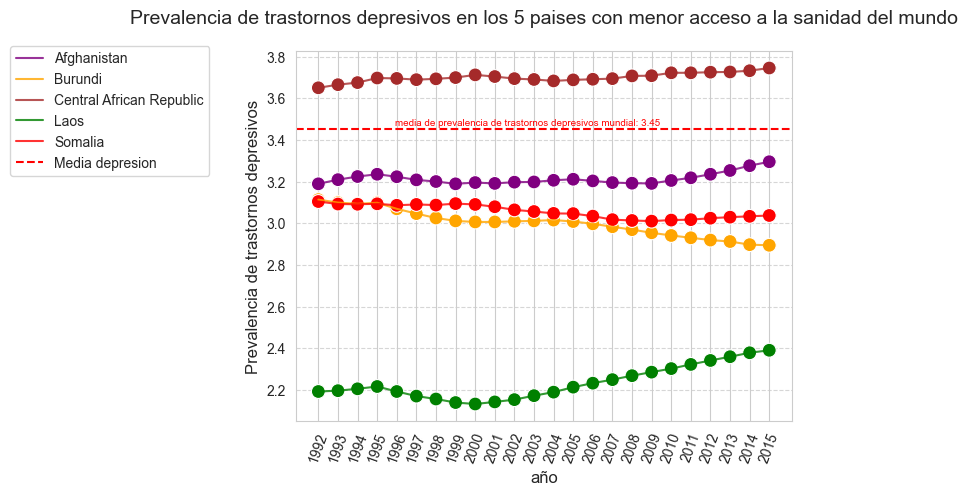

In [319]:
sns.scatterplot(data = graf_b,x = "año",y = "depresion",hue = "Country",markers=["v","^"], palette = lista_colores2,legend=False, s = 100,)
sns.lineplot(data = graf_b,x = "año",y = "depresion",hue = "Country", palette = lista_colores2,linestyle="-",linewidth = 1.5,alpha =0.8)
plt.axhline(media_depresion,color="r",linestyle="--",label= "Media depresion")
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Prevalencia de trastornos depresivos en los 5 paises con menor acceso a la sanidad del mundo",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.8)
plt.xticks(rotation=70,fontsize=10)
plt.annotate(f'media de prevalencia de trastornos depresivos mundial: {media_depresion:.2f}',xy=(0.2,0.80),xycoords="axes fraction", fontsize = 7,color = "r")
plt.xlabel("año",fontsize=12)
plt.ylabel("Prevalencia de trastornos depresivos",fontsize = 12);

POR ÚLTIMO VER CÓMO SE RELACIONAN ENTRE SI LAS VARIABLES MÁS IMPORTANTES

In [352]:
varinteres = variables.drop(columns={"Population","personas depresion","total personas continente","peso_ponderacion","depresion ponderada","porcentaje depresion","suicidios totales"})

In [ ]:
matriz_correlaciones = varinteres.corr(numeric_only=True)
matriz_correlaciones

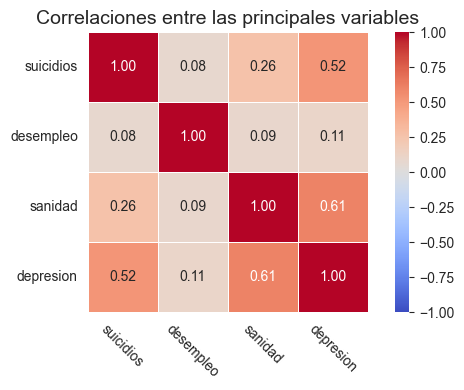

In [357]:
plt.figure(figsize=(6,4))
sns.heatmap(data= matriz_correlaciones,annot=True,fmt=".2f",cmap="coolwarm",vmin=-1,vmax= 1,linewidths=0.5,square=True)
plt.title("Correlaciones entre las principales variables",fontsize =14)
plt.xticks(rotation=-45)
plt.yticks(rotation=0)
plt.tight_layout()